# Project 2 Part 6

# intro

imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import joblib

from tensorflow.keras.layers import TextVectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

from tensorflow.keras import layers
from tensorflow.keras import optimizers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn import set_config


definitions

In [2]:
%load_ext autoreload 
%autoreload 2

import custom_functions as fn

config

In [3]:
tf.keras.utils.set_random_seed(42)
tf.random.set_seed(42)
np.random.seed(42)

set_config(transform_output='pandas')
pd.set_option('display.max_colwidth', 250)

data

In [4]:
# Load the joblib containing the data frame from Part 5 of the project.
df = joblib.load('Data-NLP/movie_reviews_preprocessed.pkl')
original_df = df.copy()
df.head()

,Unnamed: 0,review_id,movie_id,imdb_id,original_title,review,rating,sentiment,tokenized_text,lemmatized_text,joined_lemmatized_text,joined_tokenized_text
0,0,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",9.0,High,"['guilty', 'pleasure', 'personally', 'love', 'great', 'escape', 'works', 'seen', 'years', 'rightfully', 'esteemed', 'british', 'animation', 'company', 'highly', 'recommended', 'children', 'adults', 'enjoy', 'animation']","['guilty', 'pleasure', 'personally', 'love', 'great', 'escape', 'work', 'see', 'year', 'rightfully', 'esteem', 'british', 'animation', 'company', 'highly', 'recommend', 'child', 'adult', 'enjoy', 'animation']",guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation,guilty pleasure personally love great escape works seen years rightfully esteemed british animation company highly recommended children adults enjoy animation
1,1,57b2d23dc3a36837d7000b14,955,tt0120755,Mission: Impossible II,"The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully...",3.0,Low,"['underwhelmed', 'straight', 'bored', 'course', 'seeing', 'hunt', 'climb', 'mountain', 'harness', 'impressive', 'sure', 'liked', 'idea', 'villain', 'piece', 'angle', 'woefully', 'underdeveloped', 'setting', 'predominantly', 'australia', 'grab', '...","['underwhelme', 'straight', 'bore', 'course', 'see', 'hunt', 'climb', 'mountain', 'harness', 'impressive', 'sure', 'like', 'idea', 'villain', 'piece', 'angle', 'woefully', 'underdeveloped', 'set', 'predominantly', 'australia', 'grab', 'attention'...",underwhelme straight bore course see hunt climb mountain harness impressive sure like idea villain piece angle woefully underdeveloped set predominantly australia grab attention say cause pretty biased come hear tell mission impossible ii low poi...,underwhelmed straight bored course seeing hunt climb mountain harness impressive sure liked idea villain piece angle woefully underdeveloped setting predominantly australia grab attention saying cause pretty biased comes hear tell mission impossi...
2,2,5e9120963679a10018375490,955,tt0120755,Mission: Impossible II,After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf...,2.0,Low,"['entertainign', 'mission', 'impossible', 'second', 'installment', 'turned', 'terrible', 'screenwriters', 'know', 'fill', '2', 'hrs', 'action', 'overuse', 'heroic', 'slow', 'motion', 'scenes', 'horrible', 'need', 'barf', 'bag', 'stand', 'slo', 'm...","['entertainign', 'mission', 'impossible', 'second', 'installment', 'turn', 'terrible', 'screenwriter', 'know', 'fill', '2', 'hrs', 'action', 'overuse', 'heroic', 'slow', 'motion', 'scene', 'horrible', 'need', 'barf', 'bag', 'stand', 'slo', 'mo', ...",entertainign mission impossible second installment turn terrible screenwriter know fill 2 hrs action overuse heroic slow motion scene horrible need barf bag stand slo mo second 15 second amazed decide push m movie turn well hard beat lousy piece ...,entertainign mission impossible second installment turned terrible screenwriters know fill 2 hrs action overuse heroic slow motion scenes horrible need barf bag stand slo mo seconds 15 seconds amazed decide push m movies turned better hard beat l...
3,3,608e2744d8cc4a0058dc4272,2621,tt0122459,Return to Me,"Okay, I will admit I can be a bit of an easy grader when it comes to roma

In [5]:
# Drop any reviews that do not have a rating.
df['rating'].isna().sum()

0

## Build Modeling Pipeline

Use the original review column as your X and the classification target (High/Low Rating Reviews) as your y.

In [6]:
X = df['review']
y = df[['sentiment']]

X.shape, y.shape

((2419,), (2419, 1))

In [7]:
# Instantiate the LabelEncoder
encoder = LabelEncoder()
# Fit and Transform the strings into integers
y = pd.Series(encoder.fit_transform(y))
y.value_counts()

c:\Users\dsdye\anaconda3\envs\dojo-env\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1    1224
0    1195
dtype: int64

Create a Text Vectorizer

In [8]:
# count_vectorizer = CountVectorizer(token_pattern=r'\b[a-zA-Z]+\b', stop_words='english', ngram_range=(1, 2))

# X = count_vectorizer.fit_transform(df['review'])
# count_vectorizer.get_feature_names_out()[:30]

In [9]:
# # Convert to Dataset object
# ds = tf.data.Dataset.from_tensor_slices((X.toarray(), y))
# ds

In [10]:
# # Determing how many samples for each split
# # Calculate the number of samples for training 
# split_train = 0.7
# n_train_samples =  int(len(ds) * split_train)
# print(f"Use {n_train_samples} samples as training data")
# # Calculate the number of samples for validation
# split_val = 0.2
# n_val_samples = int(len(ds) * split_val)
# print(f"Use {n_val_samples} samples as validation data")
# # Test size is remainder
# split_test = 1 - (split_train + split_val)
# print(f"The remaining {len(ds)- (n_train_samples+n_val_samples)} samples will be used as test data.")


In [11]:
# # Use .take to slice out the number of samples for training
# train_ds = ds.take(n_train_samples)
# # Skipover the training batches
# val_ds = ds.skip(n_train_samples)
# # Take .take to slice out the correct number of samples for validation
# val_ds = val_ds.take(n_val_samples)
# # Skip over all of the training + validation samples, the rest remain as samples for testing
# test_ds = ds.skip(n_train_samples + n_val_samples)


In [12]:
# # shuffling the data once
# ds = ds.shuffle(buffer_size=len(ds), reshuffle_each_iteration=False)

In [13]:
# #  Setting the batch_size for all datasets
# BATCH_SIZE = 30
# train_ds = train_ds.batch(BATCH_SIZE)
# val_ds = val_ds.batch(BATCH_SIZE)
# test_ds = test_ds.batch(BATCH_SIZE)
# # Confirm the number of batches in each
# print (f' There are {len(train_ds)} training batches.')
# print (f' There are {len(val_ds)} validation batches.')
# print (f' There are {len(test_ds)} testing batches.')



In [14]:
# # Get just the text from ds_train
# ds_texts = train_ds.map(lambda x, y: x)
# # Preview the text
# ds_texts.take(1).get_single_element()



In [15]:
# Train test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=0.25, random_state=42, stratify=y)

In [16]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((1814,), (1814,), (605,), (605,))

In [17]:
# Create a pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer(token_pattern=r'\b[a-zA-Z]+\b', stop_words='english', ngram_range=(1, 2))),
    ('clf', RandomForestClassifier())
])

# Fit the pipeline to your data
# pipeline.fit(X_train_full, y_train_full)

# Predict the labels of the test set
# y_pred = pipeline.predict(X_test)

In [20]:
pipeline.fit(X_train_full, y_train_full)

Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english',
                                 token_pattern='\\b[a-zA-Z]+\\b')),
                ('clf', RandomForestClassifier())])

predict

In [21]:
y_pred = pipeline.predict(X_test)

----------------------------------------------------------------------
 Classification Metrics: 
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.86      0.81       299
           1       0.84      0.76      0.80       306

    accuracy                           0.81       605
   macro avg       0.81      0.81      0.81       605
weighted avg       0.81      0.81      0.81       605



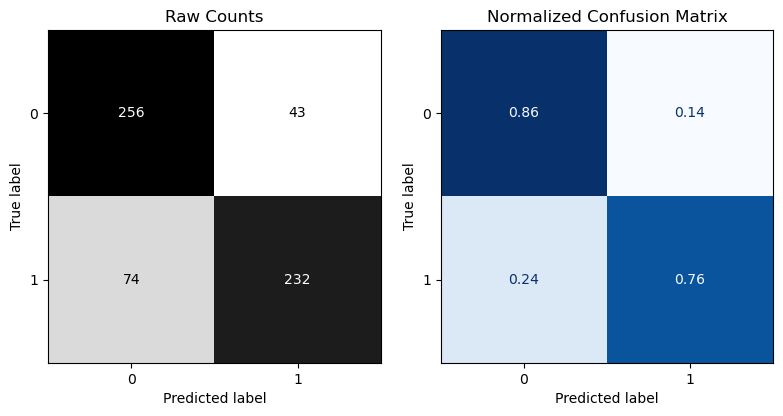

In [22]:
fn.classification_metrics(y_test, y_pred)

In a Markdown cell, document your observations from your results. (e.g., how good is the model overall? Is it particularly good/bad at predicting one class?)
  * The model is best at predicting low-rating movies (0, 0)

In [18]:
# Create Text Vectorization Layer
# tfidf_vectorizer = tf.keras.layers.TextVectorization(
#     standardize="lower_and_strip_punctuation",
#     output_mode="count",
# )


NameError: name 'count_vectorizer' is not defined

In [ ]:


# GridSearch Text Vectorization

# Attempt to improve your model by tuning the text preprocessing steps.

# Construct a grid of parameters for the text vectorization step. Consider trying:

# CountVectorizer/TfidfVectorizer
# stopwords
# ngram_range
# min_df/max_df
# Fit and evaluate the grid search results:

# What were the best parameters?
# How does the best estimator perform when evaluated on the training and test data?


# Deep NLP (RNNs)
# For this part of the project, you will use a Keras TextVectorization layer as part of your RNN model. This serves the same purpose as using the sklearn pipeline: it bundles text preparation into the model, making it deployment-ready.

# Create train/test/val datasets

# Convert the target categories to integers (e.g., Using sklearn's LabelEncoder)
# Create a tensorflow dataset using the X and (integer version) of y.
# Split the dataset into training, test, and validation datasets.
# Create a Keras Text Vectorization layer

# Create a Keras text vectorization layer for an RNN (sequence) model.
# Fit/Adapt the text vectorization layer on the training texts.
# Save the vocabulary size from the layer to use in your models' Embedding layer.
# Build an RNN with the TextVectorization Layer

# Build and fit at least 1 sequence model (LSTM, GRU, Bidirectional, etc.)

# Evaluate the model on the training and test data.

# In a Markdown cell, document your observations from your results. (e.g., How did the RNN compare to your ML model? Was it superior to your ML model in some way (e.g., accuracy, recall, etc.)
# Deliverables:

# New notebook file for text classification